# Lista 3
### Maria Nowacka 275981

In [209]:
import numpy as np, matplotlib.pyplot as plt, sklearn, pandas as pd

### zadanie 1
Implementacja prostej regresji liniowej: Zaimplementuj prostą regresję liniową (jedna zmienna niezależna) od podstaw, używając metody najmniejszych kwadratów (Ordinary Least Squares - OLS). Wygeneruj syntetyczny zbiór danych, dopasuj do niego model i zwizualizuj
linię regresji.

In [210]:
def inverse_matrix(A, tol=1e-12):
    A = A.astype(float)
    n = A.shape[0]
    # [A | I]
    augmented = np.hstack((A, np.eye(n)))

    for i in range(n):
        pivot_row = i + np.argmax(np.abs(augmented[i:, i]))
        if abs(augmented[pivot_row, i]) < tol:
            raise ValueError("Macierz jest osobliwa lub źle uwarunkowana.")

        if pivot_row != i:
            augmented[[i, pivot_row]] = augmented[[pivot_row, i]]

        augmented[i] /= augmented[i, i]

        for j in range(n):
            if j != i:
                factor = augmented[j, i]
                augmented[j] -= factor * augmented[i]

    A_inv = augmented[:, n:]
    return A_inv

def regresja(X, y):
    # OLS: beta_hat = (X^T X)^(-1) X^T y
    if y.ndim == 1:
        y = y.reshape(-1, 1)
    XtX = X.T @ X
    XtX_inv = inverse_matrix(XtX)
    C = XtX_inv @ X.T
    beta_hat = C @ y
    return beta_hat

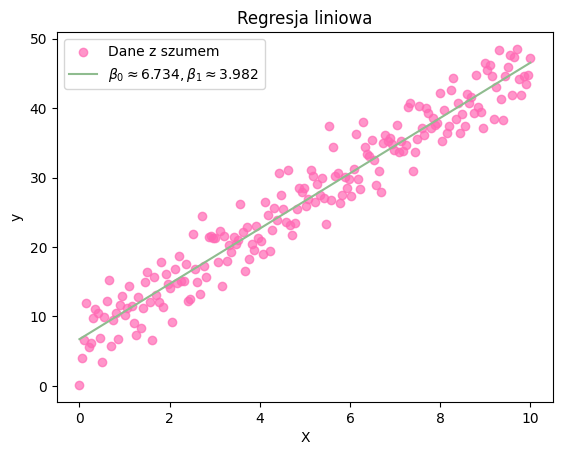

In [213]:
n=200
xs = np.linspace(0, 10, n)
X1 = np.column_stack((np.ones(n), xs))
noise = np.random.normal(0, 3, n)
y1 = 4 * xs + 7 + noise
beta_hat = regresja(X1, y1).flatten()
plt.scatter(xs, y1, color='hotpink', alpha=0.7, label='Dane z szumem')
plt.plot(xs, X1 @ beta_hat, color='darkseagreen', label=rf'$ \beta_0 \approx {beta_hat[0]:.3f}, \beta_1 \approx {beta_hat[1]:.3f}$')
plt.legend();plt.xlabel('X');plt.ylabel('y')
plt.title('Regresja liniowa')
plt.show()


### zadanie 2
Regresja liniowa z `scikit-learn`: Użyj klasy `LinearRegression` z biblioteki `scikit-learn` do rozwiązania problemu z zadania 1. Porównaj uzyskane współczynniki z własną implementacją. Następnie, użyj publicznie dostępnego zbioru danych (np. Boston Housing) do zbudowania modelu regresji wielokrotnej.

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
LinearRegression().fit(X, y)
reg = LinearRegression().fit(X, y)
reg.score(X, y), reg.coef_, reg.intercept_

(0.9395126647785074,
 array([0.       , 4.1048924]),
 np.float64(6.72624079321934))

In [7]:
beta_hat

array([6.72624079, 4.1048924 ])

In [62]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
X = data[column_names[:-1]]
y = data[column_names[-1]]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [63]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [64]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X, y), reg.coef_, reg.intercept_

(0.7387767058844854,
 array([-1.04062328e-01,  3.95373031e-02,  3.77696047e-02,  2.29506678e+00,
        -1.91120994e+01,  3.68320341e+00,  1.21990353e-02, -1.43279025e+00,
         3.24310621e-01, -1.15757791e-02, -9.91844852e-01,  1.03722026e-02,
        -5.83452162e-01]),
 np.float64(37.45705483689432))

In [73]:
y_pred = reg.predict(X_test)

### zadanie 3
Metryki oceny regresji: Oblicz i zinterpretuj podstawowe metryki oceny modelu regresji: średni błąd kwadratowy (MSE), pierwiastek średniego błędu kwadratowego (RMSE), średni błąd bezwzględny (MAE) oraz współczynnik determinacji (R2).

In [66]:
def MSE(y, y_pred):
    n = len(y)
    mse = sum((y - y_pred)**2)/n
    # mse2 = sum([(y[i] - y_pred[i])**2 for i in range(n)])/n
    return mse

def RMSE(y, y_pred):
    return np.sqrt(MSE(y, y_pred))

def MAE(y, y_pred):
    n = len(y)
    mae = sum(abs(y - y_pred))/n
    return mae

def R2(y, y_pred):
    y_mean = sum(y)/len(y)
    # r2 = sum((y_pred-y_mean)**2)/sum((y - y_mean)**2) alternatywny wzór
    r2 = 1 - sum((y - y_pred)**2)/sum((y - y_mean)**2) # z wykładu
    return r2

In [74]:
MSE(y_test, y_pred)

22.648394694654055

In [75]:
RMSE(y_test, y_pred)

np.float64(4.759032957928959)

In [77]:
MAE(y_test, y_pred)

3.484947192931404

In [78]:
R2(y_test, y_pred)

0.7596418918235848

### zadanie 4
Regularyzacja - Ridge i Lasso: Wprowadź szum do danych z zadania 1. Zbuduj model regresji liniowej, regresji grzbietowej (`Ridge`) i regresji lasso (`Lasso`). Porównaj współczynniki modeli i wyjaśnij, jak regularyzacja wpływa na wagę cech.

In [91]:
from sklearn.linear_model import Ridge, Lasso
linear = LinearRegression()
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=1.0)
linear.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)
y_linear = linear.predict(X_train)
y_lasso = lasso.predict(X_test)
y_ridge = ridge.predict(X_test)
print("linear R²:", linear.score(X_test, y_test))
print("Współczynniki:", linear.coef_)
print("lasso R²:", lasso.score(X_test, y_test))
print("Współczynniki:", lasso.coef_)
print("ridge R²:", ridge.score(X_test, y_test))
print("Współczynniki:", ridge.coef_)


linear R²: 0.7596418918235848
Współczynniki: [-1.04062328e-01  3.95373031e-02  3.77696047e-02  2.29506678e+00
 -1.91120994e+01  3.68320341e+00  1.21990353e-02 -1.43279025e+00
  3.24310621e-01 -1.15757791e-02 -9.91844852e-01  1.03722026e-02
 -5.83452162e-01]
lasso R²: 0.7422920141209346
Współczynniki: [-9.60485365e-02  4.35569212e-02 -2.32720126e-02  4.06193823e-01
 -0.00000000e+00  3.43473900e+00  2.40675878e-03 -1.08944320e+00
  3.00093353e-01 -1.41917048e-02 -7.80787964e-01  1.11603758e-02
 -6.50989488e-01]
ridge R²: 0.7597407538065838
Współczynniki: [-1.00787364e-01  4.15185764e-02  2.03687848e-03  2.07711004e+00
 -1.05147806e+01  3.69734731e+00  5.45287287e-03 -1.30373654e+00
  3.07776265e-01 -1.24013961e-02 -8.91188385e-01  1.07618118e-02
 -6.00952869e-01]


### zadanie 5
Wprowadzenie do regresji logistycznej: Zaimplementuj funkcję sigmoidalną w Pythonie. Wyjaśnij jej rolę w regresji logistycznej i zwizualizuj jej przebieg. Omów, dlaczego jest ona używana w problemach klasyfikacji binarnej.

In [85]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

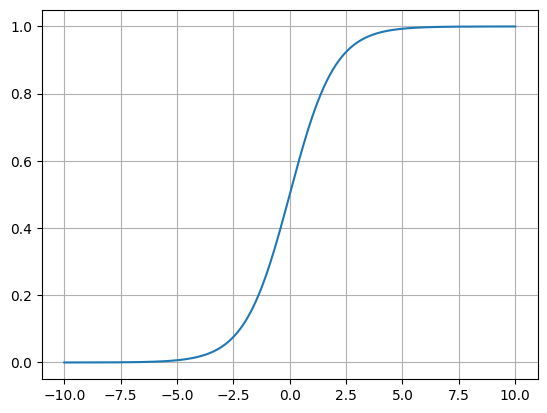

In [88]:
x = np.linspace(-10, 10, 300)
y = sigmoid(x)
plt.plot(x, y); plt.grid()

### zadanie 6
Implementacja regresji logistycznej z `scikit-learn`: Wczytaj publiczny zbiór danych do klasyfikacji (np. `Titanic` lub `Breast Cancer`). Podziel dane na zbiór treningowy i testowy. Wytrenuj model regresji logistycznej i dokonaj predykcji.

In [206]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder
data = fetch_openml(name='titanic', version=1).frame
X = data.drop(columns = ['survived', 'name', 'fare', 'cabin', 'home.dest', 'ticket', 'boat', 'body'])
y = data['survived']
X['age'] = X.groupby(['pclass', 'sex'], observed=True)['age'].transform(lambda x: x.fillna(x.median()))
dummies = []
for col in X.select_dtypes(include=['object', 'category']).columns:
    if X[col].nunique()<=5:
        dummies.append(col)

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded = encoder.fit_transform(X[dummies])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(dummies))
data_smart = pd.concat([X.drop(columns=dummies), encoded_df], axis=1)
data_smart.head()

,pclass,age,sibsp,parch,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,embarked_nan
0,1,29.0000,0,0,1.0,0.0,0.0,0.0,1.0,0.0
1,1,0.9167,1,2,0.0,1.0,0.0,0.0,1.0,0.0
2,1,2.0000,1,2,1.0,0.0,0.0,0.0,1.0,0.0
3,1,30.0000,1,2,0.0,1.0,0.0,0.0,1.0,0.0
4,1,25.0000,1,2,1.0,0.0,0.0,0.0,1.0,0.0


In [207]:
X_train, X_test, y_train, y_test = train_test_split(data_smart, y, test_size=0.2)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=X_train.columns,
    index=X_train.index
)
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns,
    index=X_test.index
)
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(class_weight='balanced', max_iter = 500)
log_reg.fit(X_train_scaled, y_train)
# log_reg.score(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)

### zadanie 7
Metryki oceny klasyfikacji: Dla modelu z zadania 6, oblicz i zinterpretuj następujące metryki: dokładność (`accuracy`), precyzję (`precision`),
czułość (`recall`) oraz macierz pomyłek (`confusion matrix`).

Accuracy: 0.7709923664122137
Precision: 0.8417721518987342
Recall: 0.7916666666666666


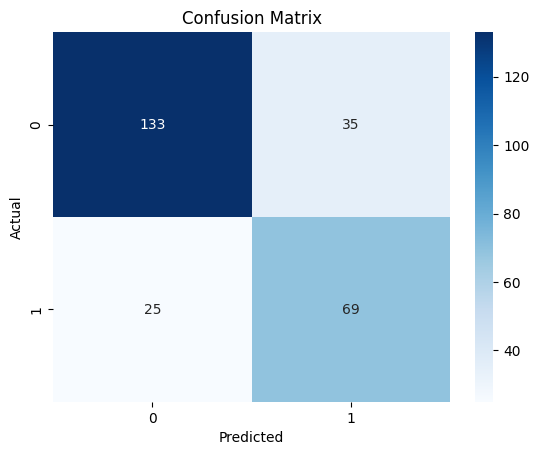

Confusion matrix:
 [[133  35]
 [ 25  69]]


In [208]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
accuracy = accuracy_score(y_test, y_pred)
label='0' #Dead
precision = precision_score(y_test, y_pred, pos_label=label)
recall = recall_score(y_test, y_pred, pos_label=label)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print("Confusion matrix:\n", cm)